In [1]:
## Data prepossessing for training and testing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
## Create a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape


(1198, 60, 1)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [12]:
## Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))         
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) 
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

c:\Users\Abdul Rehman\miniconda3\envs\my_ai\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - loss: 0.0508
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0065
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0056
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0051
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0054
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0046
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0052
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0046
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0049
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0056
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0044
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0044
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0041
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - l

In [14]:
## Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step


array([[804.86743],
       [802.0475 ],
       [802.5286 ],
       [804.0789 ],
       [807.4984 ],
       [813.36334],
       [818.3964 ],
       [819.97424],
       [819.8559 ],
       [819.4942 ],
       [819.43256],
       [819.51135],
       [819.69855],
       [820.57214],
       [821.7511 ],
       [826.6777 ],
       [833.6843 ],
       [840.8463 ],
       [844.2172 ],
       [839.2082 ]], dtype=float32)

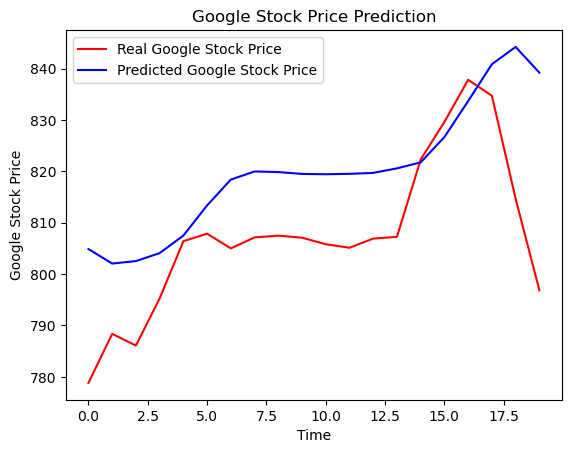

In [16]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()